In [302]:
### import important packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [303]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/titanic-training-data.csv")

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [305]:
df.shape

(891, 12)

In [306]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [307]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [308]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [309]:
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [310]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Analyse the Data**

<Axes: xlabel='Survived', ylabel='count'>

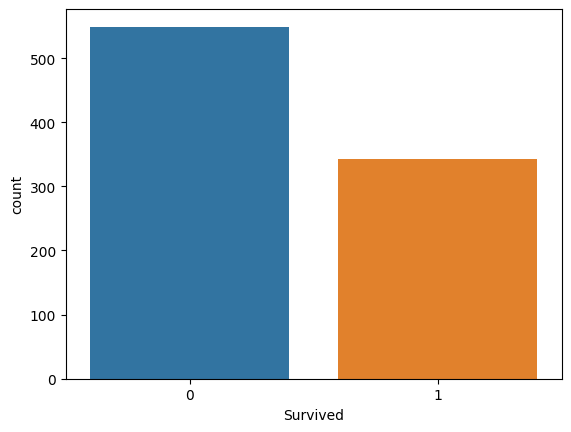

In [311]:
sns.countplot(x="Survived",data=df)

In [312]:
pd.crosstab(df["Survived"],df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


<Axes: xlabel='Survived', ylabel='count'>

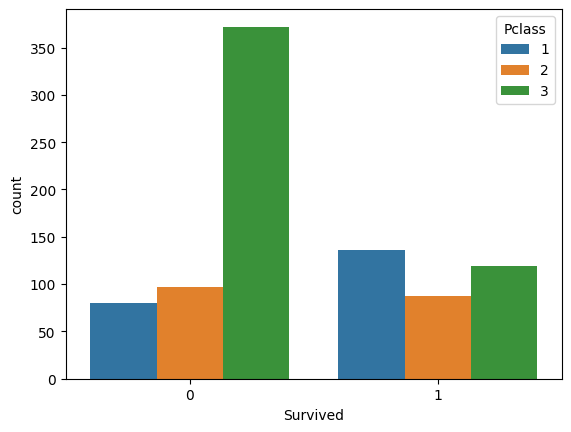

In [313]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

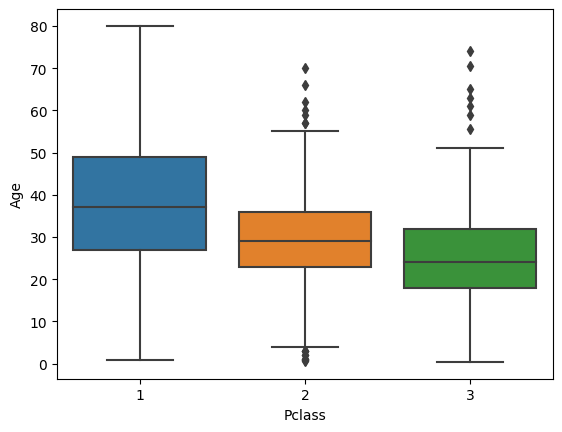

In [314]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [315]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [316]:
df.drop("Cabin",axis=1,inplace=True)

In [317]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [318]:
df.shape

(891, 11)

In [319]:
df.dropna(inplace=True)

In [320]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [321]:
df.shape

(712, 11)

In [322]:
df=pd.get_dummies(df,columns=["Sex","Pclass","Embarked"])

In [323]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1


In [324]:
df.drop(["Name","PassengerId","Ticket","Fare"],axis=1)

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,1,0,0,0,0,1
4,0,35.0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,1,0,0,0,1,0,1,0
886,0,27.0,0,0,0,1,0,1,0,0,0,1
887,1,19.0,0,0,1,0,1,0,0,0,0,1
889,1,26.0,0,0,0,1,1,0,0,1,0,0


In [325]:
df=df.drop(["Name","PassengerId","Ticket","Fare"],axis=1)

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Age         712 non-null    float64
 2   SibSp       712 non-null    int64  
 3   Parch       712 non-null    int64  
 4   Sex_female  712 non-null    uint8  
 5   Sex_male    712 non-null    uint8  
 6   Pclass_1    712 non-null    uint8  
 7   Pclass_2    712 non-null    uint8  
 8   Pclass_3    712 non-null    uint8  
 9   Embarked_C  712 non-null    uint8  
 10  Embarked_Q  712 non-null    uint8  
 11  Embarked_S  712 non-null    uint8  
dtypes: float64(1), int64(3), uint8(8)
memory usage: 33.4 KB


In [327]:
df.dropna(inplace=True)

In [328]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [329]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [330]:
model=LogisticRegression()

In [331]:
model.fit(X_train,y_train)

LogisticRegression()

In [332]:
model.score(X_train,y_train)

0.8052208835341366

In [333]:
model.score(X_test,y_test)

0.780373831775701

In [334]:
predictions=model.predict(X_test)

In [335]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.780373831775701

In [336]:
from sklearn import metrics

<Axes: >

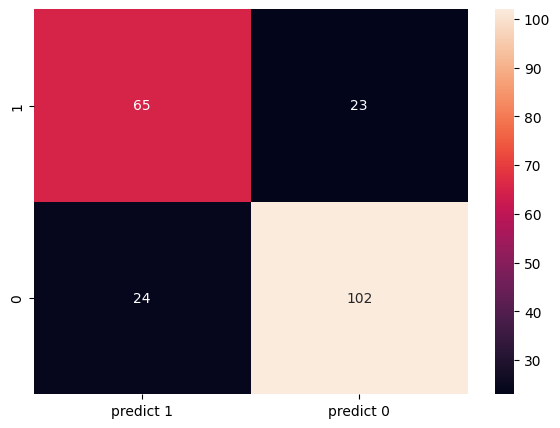

In [337]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],columns=[i for i in["predict 1","predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [338]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       126
           1       0.73      0.74      0.73        88

    accuracy                           0.78       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214



In [339]:
from sklearn.tree import DecisionTreeClassifier

In [340]:
model2=DecisionTreeClassifier()

In [341]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [342]:
model2.score(X_train,y_train)

0.9598393574297188

In [343]:
model2.score(X_test,y_test)

0.7710280373831776

In [344]:
model3=DecisionTreeClassifier(max_depth=3,criterion='entropy')

In [345]:
model3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [346]:
model3.score(X_train,y_train)

0.8192771084337349

In [347]:
model3.score(X_test,y_test)

0.7897196261682243

In [348]:
from sklearn.ensemble import BaggingClassifier

In [349]:
model4=BaggingClassifier(n_estimators=100,base_estimator=model3)

In [350]:
model4.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=3),
                  n_estimators=100)

In [351]:
model4.score(X_train,y_train)

0.8413654618473896

In [352]:
model4.score(X_test,y_test)

0.8037383177570093

In [353]:
from sklearn.ensemble import AdaBoostClassifier

In [399]:
model5=AdaBoostClassifier(n_estimators=50)

In [400]:
model5.fit(X_train,y_train)

AdaBoostClassifier()

In [401]:
model5.score(X_train,y_train)

0.8493975903614458

In [402]:
model5.score(X_test,y_test)

0.7897196261682243

In [358]:
from sklearn.ensemble import GradientBoostingClassifier

In [359]:
model6=GradientBoostingClassifier(n_estimators=10)

In [360]:
model6.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=10)

In [361]:
model6.score(X_train,y_train)

0.8293172690763052

In [362]:
model6.score(X_test,y_test)

0.7990654205607477

In [363]:
from sklearn.ensemble import RandomForestClassifier

In [448]:
model7=RandomForestClassifier(n_estimators=5)

In [453]:
model7.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [454]:
model7.score(X_train,y_train)

0.9317269076305221

In [451]:
model7.score(X_test,y_test)

0.7663551401869159

In [369]:
from sklearn.svm import SVC

In [417]:
model8=SVC()

In [418]:
model8.fit(X_train,y_train)

SVC()

In [419]:
model8.score(X_train,y_train)

0.6285140562248996

In [420]:
model8.score(X_test,y_test)

0.6121495327102804